In [1]:
import numpy as np
import pandas as pd
import gc

from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import catboost as cat
import xgboost as xgb
import lightgbm as lgbm

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')


pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [2]:
train = pd.read_csv('../input/rnd-42-welcome/r42_welcome_train/r42_welcome_train.csv', sep=';')
test = pd.read_csv('../input/rnd-42-welcome/r42_welcome_test/r42_welcome_test.csv', sep=';')
target = pd.read_csv('../input/rnd-42-welcome/r42_welcome_train_res.csv', sep=';').iloc[:, 1]
sample = pd.read_csv('../input/rnd-42-welcome/r42_welcome_test_sample.csv', sep=',')

In [3]:
train.head()

,ID,DT,C_1,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,N_23,N_24,N_25,N_26,N_27,N_28,N_29,N_30,N_31,N_32,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_48,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_61,N_62,N_63,N_64,N_65,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,C_2,C_3,N_76,N_77,N_78,C_4,N_79,N_80,N_81,N_82
0,27253,2019-02-24 13:13:52,6,2.4,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0000,0.00,0.0,0.0000,0.0714,1.0,0.0476,1.00,0.0333,1.0,0.0167,0.0166,1.0,0.0111,0.0056,1.0000,0.5000,1.0,0.5000,0.3333,1.0,0.3333,0.2500,1.0,0.2500,0.0667,0.1833,1.0,0.0667,0.0526,0.0141,1.0,0.0526,-1,-410,-0.5,0.0,-0.1667,0.0,7,120.0000,60.0000,120.0000,60.0000,0.0000,0.0400,0.0400,0.0400,0.0000,0.9600,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.5000,1,NaN,1.0000,2,780.0,1,0.0000,1.0000,0.7741,0.7383
1,173769,2019-12-14 07:22:57,3,0.4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0000,0.00,0.0,0.0000,0.0000,0.0,0.0000,0.00,0.0000,0.0,0.0167,-0.0167,1.0,0.0556,-0.0389,1.6667,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.1667,-0.1667,2.0,0.0833,0,0,0.0,0.0,0.0000,0.0,57,3.0000,-54.0000,3.0000,-54.0000,0.0000,0.0588,0.0588,0.0588,0.0000,0.9412,0.4000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6000,1,1.0,1.0000,1,270.0,1,0.0000,1.0000,-0.5309,-0.2683
2,138042,2019-10-04 14:42:17,1,4.0,0.3,0,0,1,0,0,0,0,0,0,2,0,0,0,2,0,0.5,0.3333,0.25,0.2,0.1667,0.2143,1.5,0.2381,1.25,0.2333,1.4,0.2500,-0.0167,1.5,0.2556,-0.0056,1.4375,1.0000,2.0,0.5000,0.6667,2.0,0.3333,1.0000,2.0,0.5000,0.5000,0.5000,2.0,0.2500,0.3333,0.1667,2.0,0.1667,1,270,-1.0,-300.0,-0.5000,115.0,2,1.0000,-1.0000,1.0000,-1.0000,0.0000,0.2778,0.2778,0.3333,0.0556,0.6667,0.2963,0.0556,0.0000,0.0370,0.0556,0.0556,0.5000,1,1.0,1.0000,2,550.0,1,0.0000,1.0000,0.1805,0.1026
3,49748,2019-04-10 11:32:47,0,0.4,0.6,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1.0,0.6667,0.50,0.4,0.3333,0.1429,2.0,0.0952,2.00,0.0667,2.0,0.0500,0.0167,1.5,0.0333,0.0167,1.5000,0.3333,2.0,0.1667,0.2222,2.0,0.1111,0.1538,2.0,0.0769,0.1250,0.0288,1.5,0.0833,0.0811,0.0439,1.5,0.0541,2,780,2.0,780.0,1.8333,780.0,1,40.0000,39.0000,100.0000,99.0000,0.0000,0.0213,0.0213,0.0426,0.0213,0.9574,0.0000,0.3333,0.0000,0.0000,0.0000,0.0000,0.6667,1,2.0,0.6667,1,330.0,5,0.0000,1.0000,-0.1871,0.3283
4,57182,2019-04-25 13:57:30,0,0.0,0.0,0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1.0,1.0000,0.75,0.6,0.6667,0.6429,1.0,0.5714,1.00,0.6333,1.0,0.5667,0.0666,1.0,0.5444,0.0223,1.0000,1.0000,1.0,1.0000,0.8889,1.0,0.8889,0.9286,1.0,0.9286,0.8800,0.0486,1.0,0.8800,0.8108,0.0692,1.0,0.8108,0,0,0.5,0.0,-0.1667,0.0,1,1.0833,0.0833,1.3333,0.3333,0.0426,0.7660,0.7660,0.8298,0.0638,0.1277,0.0435,0.2246,0.2174,0.1812,0.1594,0.0217,0.1522,1,NaN,0.9512,2,0.0,1,0.0488,0.1144,0.1169,0.3608


In [4]:
# преобразование признака с датой и временем в подходящий формат
train['DT'] = pd.to_datetime(train['DT'])
train['month'] = train['DT'].dt.month
train['day'] = train['DT'].dt.day
train['hour'] = train['DT'].dt.hour
train.drop(['DT'], axis=1, inplace=True)


test['DT'] = pd.to_datetime(test['DT'])
test['month'] = test['DT'].dt.month
test['day'] = test['DT'].dt.day
test['hour'] = test['DT'].dt.hour
test.drop(['DT'], axis=1, inplace=True)

In [5]:
# Поиск признаков с сильным дисбалансом классов
for feat in list(train):
    if train[feat].value_counts(normalize=True).iloc[0] > 0.95:
        print('train', feat)
        
for feat in list(test):
    if test[feat].value_counts(normalize=True).iloc[0] > 0.95:
        print('test', feat)

train N_3
test N_3


In [6]:
print(train['N_3'].value_counts())
print(test['N_3'].value_counts())

0    60000
Name: N_3, dtype: int64
0    15000
Name: N_3, dtype: int64


In [7]:
# удаление константного признака
train.drop(['N_3'], axis=1, inplace=True)
test.drop(['N_3'], axis=1, inplace=True)

In [8]:
# спойлер, весь дальнейший препроцессинг только ухудшал качество LightGBM модели
train_lgbm = train
test_lgbm = test

In [9]:
# выделение количественных и категориальных признаков по отдельности
numeric_features = [feat for feat in list(train) if feat[0] == 'N']
categor_features = [feat for feat in list(train) if feat[0] == 'C']

In [10]:
train[categor_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C_1     60000 non-null  int64  
 1   C_2     60000 non-null  int64  
 2   C_3     35258 non-null  float64
 3   C_4     60000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.8 MB


In [11]:
print(train['C_3'].value_counts())
print(train['C_3'].value_counts())

2.0    17008
1.0    12612
3.0     5638
Name: C_3, dtype: int64
2.0    17008
1.0    12612
3.0     5638
Name: C_3, dtype: int64


In [12]:
# в признаке С_3 классы распределены достаточно равномерно, и много пропусков, вынесем пропуски в отдельный класс
train['C_3'].fillna(0, inplace=True)
test['C_3'].fillna(0, inplace=True)

In [13]:
# one hot encoding категориальных признаков
for feat in categor_features:
    data = pd.get_dummies(train[feat], drop_first=True)
    train.drop(feat, axis=1, inplace=True)
    data.columns = [feat + '_' + str(col) for col in list(data)]
    train = pd.concat([train, data], axis=1)
    
    data = pd.get_dummies(test[feat], drop_first=True)
    test.drop(feat, axis=1, inplace=True)
    data.columns = [feat + '_' + str(col) for col in list(data)]
    test = pd.concat([test, data], axis=1)

In [14]:
# поиск количественных признаков с пропущенными значениями
miss_value_feats = set()

for i, response in enumerate(train[numeric_features].isnull().sum() > 0):
    if response:
        miss_value_feats.add(numeric_features[i])
        print('train', numeric_features[i])
        
for i, response in enumerate(test[numeric_features].isnull().sum() > 0):
    if response:
        miss_value_feats.add(numeric_features[i])
        print('test', numeric_features[i])

train N_76
train N_81
train N_82
test N_76
test N_81
test N_82


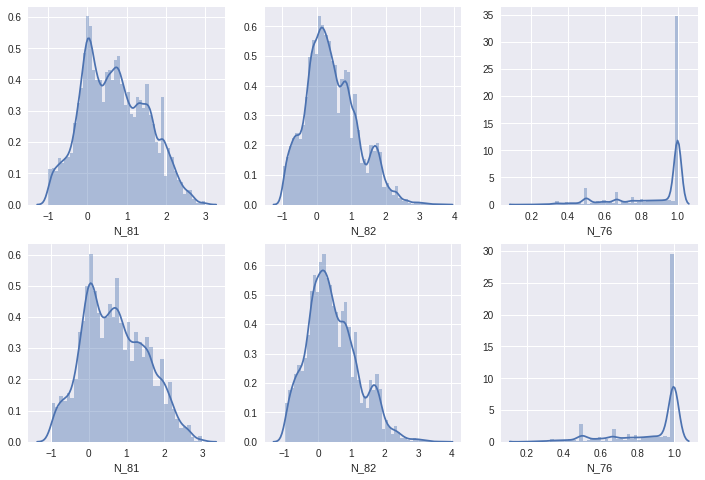

In [15]:
# распределение признаков с пропущенными значениями
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i, feat in enumerate(miss_value_feats):
    
    sns.distplot(train[feat], ax=axs[0][i])
    sns.distplot(test[feat], ax=axs[1][i])

In [16]:
# для N_76 подставлю медианyое значение, для остальных среднее
train['N_76'].fillna(train['N_76'].median(), inplace=True)
train['N_81'].fillna(train['N_81'].mean(), inplace=True)
train['N_82'].fillna(train['N_82'].mean(), inplace=True)

test['N_76'].fillna(test['N_76'].median(), inplace=True)
test['N_81'].fillna(test['N_81'].mean(), inplace=True)
test['N_82'].fillna(test['N_82'].mean(), inplace=True)

In [17]:
# поиск коррелирующих признаков
for i, feat_x in enumerate(numeric_features):
    for feat_y in numeric_features[i+1:]:
        if feat_x != feat_y:
            corr = train[feat_x].corr(train[feat_y])
            if corr > 0.97:
                print(feat_x, feat_y, corr)

N_20 N_21 0.9766898427206968
N_21 N_22 0.9841496354936632
N_23 N_25 0.9839550763115835
N_25 N_27 0.9877550784035573
N_29 N_32 0.9809890828961619
N_38 N_41 0.9721185597862362
N_44 N_48 0.9738882150994971
N_59 N_61 0.9934271471973255
N_60 N_62 0.9807183981497722
N_64 N_65 1.0


In [18]:
# удаление лишних признаков
train.drop(['N_65', 'N_62', 'N_61', 'N_48', 'N_32', 'N_25', 'N_21'], axis=1, inplace=True)
test.drop(['N_65', 'N_62', 'N_61', 'N_48', 'N_32', 'N_25', 'N_21'], axis=1, inplace=True)

In [19]:
# итоговые наборы признаков для CatBoost
train_cat = train
test_cat = test
train.head()

,ID,N_1,N_2,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_22,N_23,N_24,N_26,N_27,N_28,N_29,N_30,N_31,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_63,N_64,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,N_76,N_77,N_78,N_79,N_80,N_81,N_82,month,day,hour,C_1_1,C_1_3,C_1_4,C_1_6,C_2_1,C_2_2,C_2_3,C_2_4,C_3_1.0,C_3_2.0,C_3_3.0,C_4_2,C_4_5,C_4_6,C_4_8,C_4_9
0,27253,2.4,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0000,0.00,0.0000,0.0714,1.0,1.00,0.0333,1.0,0.0167,0.0166,1.0,0.0056,1.0000,0.5000,1.0,0.5000,0.3333,1.0,0.3333,0.2500,1.0,0.2500,0.0667,0.1833,1.0,0.0667,0.0141,1.0,0.0526,-1,-410,-0.5,0.0,-0.1667,0.0,7,120.0000,60.0000,0.0000,0.0400,0.0400,0.0000,0.9600,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.5000,1.0000,2,780.0,0.0000,1.0000,0.7741,0.7383,2,24,13,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,173769,0.4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0000,0.00,0.0000,0.0000,0.0,0.00,0.0000,0.0,0.0167,-0.0167,1.0,-0.0389,1.6667,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,-0.1667,2.0,0.0833,0,0,0.0,0.0,0.0000,0.0,57,3.0000,-54.0000,0.0000,0.0588,0.0588,0.0000,0.9412,0.4000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6000,1.0000,1,270.0,0.0000,1.0000,-0.5309,-0.2683,12,14,7,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,138042,4.0,0.3,0,1,0,0,0,0,0,0,2,0,0,0,2,0,0.5,0.3333,0.25,0.1667,0.2143,1.5,1.25,0.2333,1.4,0.2500,-0.0167,1.5,-0.0056,1.4375,1.0000,2.0,0.5000,0.6667,2.0,0.3333,1.0000,2.0,0.5000,0.5000,0.5000,2.0,0.2500,0.1667,2.0,0.1667,1,270,-1.0,-300.0,-0.5000,115.0,2,1.0000,-1.0000,0.0000,0.2778,0.3333,0.0556,0.6667,0.2963,0.0556,0.0000,0.0370,0.0556,0.0556,0.5000,1.0000,2,550.0,0.0000,1.0000,0.1805,0.1026,10,4,14,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,49748,0.4,0.6,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1.0,0.6667,0.50,0.3333,0.1429,2.0,2.00,0.0667,2.0,0.0500,0.0167,1.5,0.0167,1.5000,0.3333,2.0,0.1667,0.2222,2.0,0.1111,0.1538,2.0,0.0769,0.1250,0.0288,1.5,0.0833,0.0439,1.5,0.0541,2,780,2.0,780.0,1.8333,780.0,1,40.0000,39.0000,0.0000,0.0213,0.0426,0.0213,0.9574,0.0000,0.3333,0.0000,0.0000,0.0000,0.0000,0.6667,0.6667,1,330.0,0.0000,1.0000,-0.1871,0.3283,4,10,11,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,57182,0.0,0.0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1.0,1.0000,0.75,0.6667,0.6429,1.0,1.00,0.6333,1.0,0.5667,0.0666,1.0,0.0223,1.0000,1.0000,1.0,1.0000,0.8889,1.0,0.8889,0.9286,1.0,0.9286,0.8800,0.0486,1.0,0.8800,0.0692,1.0,0.8108,0,0,0.5,0.0,-0.1667,0.0,1,1.0833,0.0833,0.0426,0.7660,0.8298,0.0638,0.1277,0.0435,0.2246,0.2174,0.1812,0.1594,0.0217,0.1522,0.9512,2,0.0,0.0488,0.1144,0.1169,0.3608,4,25,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# подбор параметров для LightGBM

import optuna
from optuna.samplers import TPESampler
sampler = TPESampler(seed=13)

def create_model(trial):
    num_leaves = trial.suggest_int("num_leaves", 2, 150)
    n_estimators = trial.suggest_int("n_estimators", 10, 300)
    max_depth = trial.suggest_int('max_depth', 2, 15)
    min_child_samples = trial.suggest_int('min_child_samples', 10, 1200)
    learning_rate = trial.suggest_uniform('learning_rate', 0.0001, 0.99)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 2, 90)
    feature_fraction = trial.suggest_uniform('feature_fraction', 0.0001, 1.0)
    
    model = lgbm.LGBMClassifier(
        num_leaves=num_leaves,
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_child_samples=min_child_samples, 
        min_data_in_leaf=min_data_in_leaf,
        learning_rate=learning_rate,
        feature_fraction=feature_fraction,
        random_state=13,
        n_jobs=-1
)
    return model

def objective(trial):
    model = create_model(trial)
    model.fit(X_train, y_train)
    result = model.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test, result)
    return score

# X_train, X_test, y_train, y_test = train_test_split(train, target, stratify=target, random_state=13)

# study = optuna.create_study(direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=350)
# params_lgbm = study.best_params


In [21]:
params_lgbm = {'num_leaves': 62,
               'n_estimators': 266,
               'max_depth': 11,
               'min_child_samples': 987,
               'learning_rate': 0.0353163961135362,
               'min_data_in_leaf': 56,
               'bagging_fraction': 0.22809890000425248,
               'feature_fraction': 0.2969511958522369,
               'n_jobs': -1
              }

params_et = {'n_estimators': 211,
             'max_depth': 19,
             'min_samples_split': 0.0005305999976668258,
             'min_samples_leaf': 8,
             'max_features': 38,
             'n_jobs': -1
            }

params_cat = {'verbose': 0
             }

model_et = ExtraTreesClassifier(**params_et)
model_lgbm = lgbm.LGBMClassifier(**params_lgbm)
model_cat = cat.CatBoostClassifier(**params_cat)

Были так же подобраны параметры при помощи optuna для ExtraTree, но в итоговый ансамбль модель не пошла

И протестированы LogRegression, RandomForest, SVM, MLPRegressor и xgboost

Лучший результаты получились у комбинации СatBoost на данных после препроцессинга и LightGBM на сырых данных. Они и пошли в итоговый сабмишен.

In [22]:
# добавление полиномиальных признаков не добавило качества

# pol_transformer = PolynomialFeatures(2)
# pol_feats_train = pol_transformer.fit_transform(train[numeric_features])
# pol_feats_test = pol_transformer.fit_transform(test[numeric_features])

# train = pd.concat([train, pd.DataFrame(pol_feats_train)], axis=1)
# test = pd.concat([test, pd.DataFrame(pol_feats_test)], axis=1)

In [23]:
# adversarial validation не увенчалась успехом, так как данные очень хорошо поделенны на train и test

# data = pd.concat([train, test])
# data['meta_target'] = 60000*[0] + 15000*[1]
# print(cross_val_score(model_lgbm, data.iloc[:, :-1], data['meta_target'], cv=5, scoring='roc_auc'))

In [24]:
%%time

# параметры валидации, обучение будет идти на 3х5 фолдах
kFold_random_state = [13, 666, 228]
n_splits = 5

# финальный показатель метрики
final_loss = list()

# итоговые наборы для обучения (name, train_sample, test_sample, model)
sets = [['LightGBM', train_lgbm, test_lgbm, model_lgbm],
        ['CatBoost', train_cat, test_cat, model_cat]]

# файл для записи финального результата
submission = sample.copy()
submission.iloc[:, 1] = 0


for name, train, test, model in sets:
    print(f'Model: {name}', '\n')
    
    for ind_k, random_state in enumerate(kFold_random_state):
        kFold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        total_loss = list()

        for iteration, (train_index, valid_index) in enumerate(kFold.split(train, target)):

            X_train, X_valid = train.iloc[train_index], train.iloc[valid_index]
            y_train, y_valid = target[train_index], target[valid_index]

            model.fit(X_train, y_train)

            valid_pred = model.predict_proba(X_valid)[:, 1]
            loss = roc_auc_score(y_valid, valid_pred)

            predict = model.predict_proba(test)[:, 1]
            submission['Y'] = submission['Y'] + predict / 30

            total_loss.append(np.mean(loss))

        final_loss.append(np.mean(total_loss))
        print(f'Fold({["1-5", "6-10", "11-15"][ind_k]}) mean roc auc: {np.mean(total_loss)}')
    print(f'Final roc auc: {np.mean(final_loss)}')
    print()

Model: LightGBM 

Fold(1-5) mean roc auc: 0.9119967635458114
Fold(6-10) mean roc auc: 0.9116429698511583
Fold(11-15) mean roc auc: 0.9118745094081296
Final roc auc: 0.9118380809350332

Model: CatBoost 

Fold(1-5) mean roc auc: 0.9110738608124309
Fold(6-10) mean roc auc: 0.910232868051712
Fold(11-15) mean roc auc: 0.9109130600220314
Final roc auc: 0.911289005281879

CPU times: user 33min 18s, sys: 1min 39s, total: 34min 58s
Wall time: 9min 18s


In [25]:
submission

,ID,Y
0,48746,0.026100
1,92555,0.836749
2,26753,0.006469
3,33515,0.937365
4,94357,0.384861
...,...,...
14995,50410,0.006156
14996,138395,0.185663
14997,85628,0.007914
14998,159881,0.868658


In [26]:
submission.to_csv('submission_blend_catboost_and_lgbm.csv', index=False)